## Imports

In [134]:
# import relevant libraries

import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [135]:
# import csv data obtained from investing.com

adidas_data = pd.read_csv('/content/drive/MyDrive/fin_data/ADDDF Historical Data.csv')
djia_data = pd.read_csv('/content/drive/MyDrive/fin_data/Dow Jones Industrial Average Historical Data.csv')
otcqx_data = pd.read_csv('/content/drive/MyDrive/fin_data/OTCQX Composite Historical Data.csv')
sp500_data = pd.read_csv('/content/drive/MyDrive/fin_data/S&P 500 Historical Data.csv')

In [136]:
adidas_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/02/2023,176.70,178.44,178.44,176.70,NaN,0.40%
1,03/26/2023,176.00,149.50,179.75,148.37,1.63K,17.57%
2,03/19/2023,149.70,151.94,155.00,148.31,208.75K,-1.27%
3,03/12/2023,151.62,156.25,160.99,146.26,3.70K,-3.43%
4,03/05/2023,157.00,153.31,162.63,147.10,1.87K,1.37%


In [137]:
djia_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/02/2023,"33,544.90","33,246.47","33,632.04","33,246.47",NaN,0.82%
1,03/26/2023,"33,273.10","32,276.72","33,290.83","32,276.72",NaN,3.21%
2,03/19/2023,"32,238.15","31,935.21","32,761.38","31,805.18",NaN,1.19%
3,03/12/2023,"31,858.89","31,624.87","32,306.59","31,429.98",NaN,-0.16%
4,03/05/2023,"31,909.96","33,425.32","33,571.44","31,784.37",NaN,-4.43%


## Cleaning

In [138]:
def change_to_float(vol):
  '''
  variables: volume as string
  returns: volume as float or NaN
  '''
  
  while True:
    try:
      if vol[-1]=='K':
        vol = float(vol[:-1])*1000
      elif vol[-1]=='M':
        vol = float(vol[:-1])*1000000
    
    except:
      return vol

  return vol

In [139]:
def pct_to_float(pct):
  '''
  varibles: percent as string
  returns: percent as float without % sign
  
  note that range of percent values is [-100, 100]
  '''
  return float(pct[:-1])

In [140]:
# fix volume values in Adidas df

adidas_data['Volume'] = adidas_data['Vol.'].apply(lambda row: change_to_float(row))
adidas_data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Volume
0,04/02/2023,176.70,178.44,178.44,176.70,NaN,0.40%,NaN
1,03/26/2023,176.00,149.50,179.75,148.37,1.63K,17.57%,1630.0
2,03/19/2023,149.70,151.94,155.00,148.31,208.75K,-1.27%,208750.0
3,03/12/2023,151.62,156.25,160.99,146.26,3.70K,-3.43%,3700.0
4,03/05/2023,157.00,153.31,162.63,147.10,1.87K,1.37%,1870.0


In [141]:
# fix all Change % cols in all df

dfs = [adidas_data, otcqx_data, sp500_data, djia_data]

for df in dfs:
  df['PercentChange'] = df['Change %'].apply(lambda row: pct_to_float(row))

In [142]:
# set datetime index and sort oldest-most recent

adidas_data.Date = pd.to_datetime(adidas_data.Date)
adidas_data = adidas_data.set_index('Date')
adidas_data = adidas_data.sort_index()

adidas_data.head()

,Price,Open,High,Low,Vol.,Change %,Volume,PercentChange
Date,,,,,,,,
2013-01-06,89.74,89.74,89.74,89.74,0.10K,3.51%,100.0,3.51
2013-01-13,93.31,91.15,93.31,91.15,0.37K,3.98%,370.0,3.98
2013-01-20,93.00,93.00,93.25,92.95,0.57K,-0.33%,570.0,-0.33
2013-01-27,95.69,95.69,95.69,95.69,0.10K,2.89%,100.0,2.89
2013-02-03,91.15,91.15,91.15,91.15,27.67K,-4.74%,27670.0,-4.74


In [143]:
# repeat for all other dataframes

otcqx_data.Date = pd.to_datetime(otcqx_data.Date)
otcqx_data = otcqx_data.set_index('Date')
otcqx_data = otcqx_data.sort_index()

djia_data.Date = pd.to_datetime(djia_data.Date)
djia_data = djia_data.set_index('Date')
djia_data = djia_data.sort_index()

sp500_data.Date = pd.to_datetime(sp500_data.Date)
sp500_data = sp500_data.set_index('Date')
sp500_data = sp500_data.sort_index()

## Some EDA

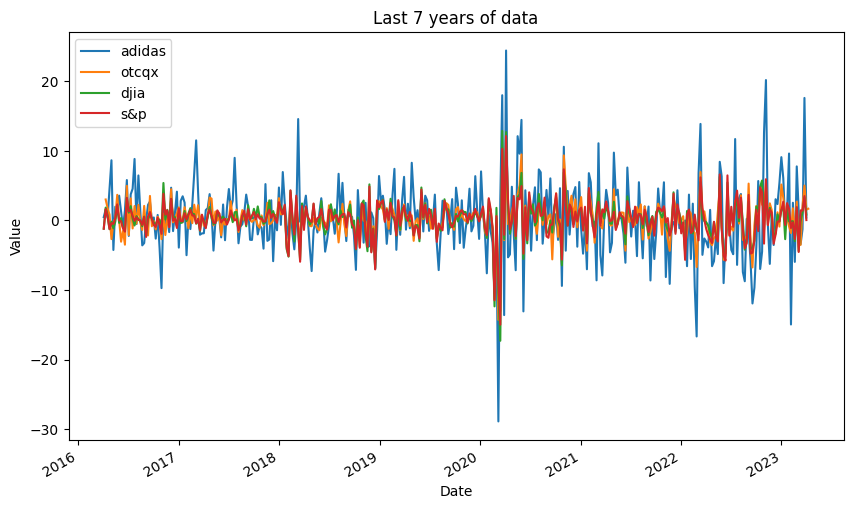

In [144]:
# look at historical trends in percent change for each index

n_years = 7 # range of dates for which all values are available

# filter data for last n years
df1 = adidas_data.loc[adidas_data.index > adidas_data.index.max() - pd.DateOffset(years=n_years)]
df2 = otcqx_data.loc[otcqx_data.index > otcqx_data.index.max() - pd.DateOffset(years=n_years)]
df3 = djia_data.loc[djia_data.index > djia_data.index.max() - pd.DateOffset(years=n_years)]
df4 = sp500_data.loc[sp500_data.index > sp500_data.index.max() - pd.DateOffset(years=n_years)]

# plot the data on the same graph
fig, ax = plt.subplots(figsize=(10, 6))

df1['PercentChange'].plot(ax=ax)
df2['PercentChange'].plot(ax=ax)
df3['PercentChange'].plot(ax=ax)
df4['PercentChange'].plot(ax=ax)

# add legends and labels
ax.legend(['adidas', 'otcqx', 'djia', 's&p'])

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title(f'Last {n_years} years of data')

plt.show()


In [145]:
# append variables of interest to one dataframe

one_df = pd.DataFrame()

one_df['adidas_pct'] = df1['PercentChange']
one_df['otcqx_pct'] = df2['PercentChange']
one_df['djia_pct'] = df3['PercentChange']
one_df['sp500_pct'] = df4['PercentChange']

one_df.head()

,adidas_pct,otcqx_pct,djia_pct,sp500_pct
Date,,,,
2016-04-03,0.46,NaN,-1.21,-1.21
2016-04-10,1.55,2.99,1.82,1.62
2016-04-17,0.41,1.74,0.59,0.52
2016-05-01,8.62,-2.70,-0.19,-0.40
2016-05-08,-4.26,-0.30,-1.16,-0.51


In [146]:
# use altair plot to enable zoom

# convert the dataframe to a long format
data = pd.melt(one_df.reset_index(), id_vars=['Date'], var_name='variable', value_name='value')

# create line chart with one line for each variable
line_chart = alt.Chart(data).mark_line(opacity=0.8, strokeWidth=1).encode(
    x=alt.X('Date:T', scale=alt.Scale(domain=alt.selection_interval())),
    y=alt.Y('value:Q', title='% change week-over-week'),
    color=alt.Color('variable:N', title='Company/Index')
).add_selection(
    alt.selection_interval(bind='scales', encodings=['x'])
)

# configure view and labels
line_chart = line_chart.configure_view(width=800, height=300)
line_chart = line_chart.transform_calculate(
    Origin_label="{'adidas_pct': 'Adidas', 'djia_pct': 'Dow Jones', 'otcqx_pct': 'OTCQX Composite', 'sp500_pct': 'S%P 500'}[datum.variable]")
line_chart = line_chart.encode(color=alt.Color('Origin_label:N', title='Company/Index'))

# save and display chart
line_chart.save('chart.html')
line_chart

alt.Chart(...)

In [147]:
# check correlation of % change for each index
one_df.corr()

,adidas_pct,otcqx_pct,djia_pct,sp500_pct
adidas_pct,1.000000,0.601448,0.475535,0.463953
otcqx_pct,0.601448,1.000000,0.834839,0.822550
djia_pct,0.475535,0.834839,1.000000,0.962857
sp500_pct,0.463953,0.822550,0.962857,1.000000


## Add moving average columns

In [148]:
# need to set price columns to float

otcqx_data['Price'] = otcqx_data['Price'].str.replace(',', '').astype(float)
djia_data['Price'] = djia_data['Price'].str.replace(',', '').astype(float)

In [149]:
# get 26-week moving average for % change for Adidas, OTCQX, DJIA

adidas_data['PriceMA'] = adidas_data['Price'].rolling(window=26).mean()
adidas_data['PercentChangeMA'] = adidas_data['PercentChange'].rolling(window=26).mean()

otcqx_data['PriceMA'] = otcqx_data['Price'].rolling(window=26).mean()
otcqx_data['PercentChangeMA'] = otcqx_data['PercentChange'].rolling(window=26).mean()

djia_data['PriceMA'] = djia_data['Price'].rolling(window=26).mean()
djia_data['PercentChangeMA'] = djia_data['PercentChange'].rolling(window=26).mean()

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate 50-day moving average
ma_a = adidas_data['PercentChange'].rolling(window=26).mean()
ma_a2 = adidas_data['PercentChange'].rolling(window=52).mean()

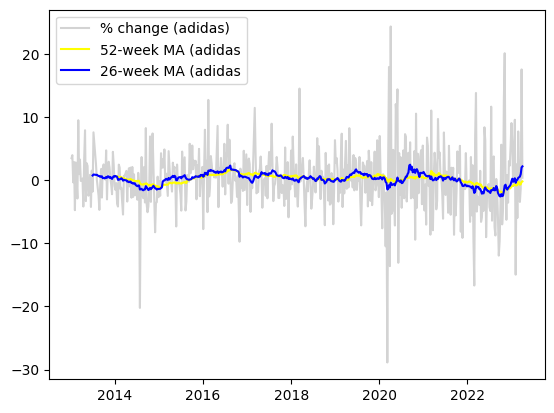

In [152]:
# Plot stock price data and moving average
fig, ax = plt.subplots()
ax.plot(adidas_data.index, adidas_data['PercentChange'], label='% change (adidas)', color='lightgray')

ax.plot(ma_a.index, ma_a2, label='52-week MA (adidas', color='yellow')
ax.plot(ma_a.index, ma_a, label='26-week MA (adidas', color='blue')


ax.legend()
plt.show()

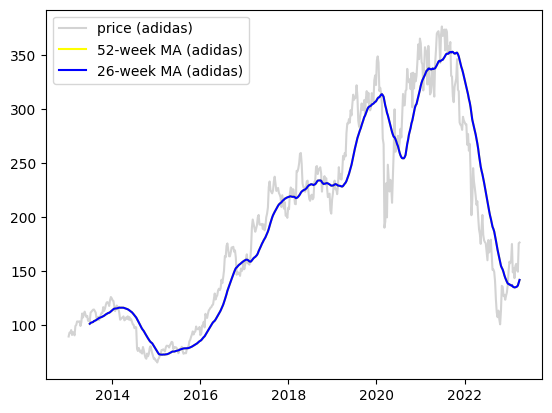

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate 50-day moving average
ma_a = adidas_data['Price'].rolling(window=26).mean()
ma_a2 = adidas_data['Price'].rolling(window=52).mean()

# Plot stock price data and moving average
fig, ax = plt.subplots()
ax.plot(adidas_data.index, adidas_data['Price'], label='price (adidas)', color='lightgray')

ax.plot(ma_a2.index, ma_a, label='52-week MA (adidas)', color='yellow')
ax.plot(ma_a.index, ma_a, label='26-week MA (adidas)', color='blue')

ax.legend()
plt.show()

## Build df for Tableau

In [110]:
# prepend index name to column names ahead of concat

# adidas
new_col_names = {}

for col in adidas_data.columns:
  new_col_names[col] = 'adidas_' + col

adidas_data = adidas_data.rename(columns=new_col_names)

# otcqx
new_col_names = {}

for col in otcqx_data.columns:
  new_col_names[col] = 'otcqx_' + col

otcqx_data = otcqx_data.rename(columns=new_col_names)

# djia
new_col_names = {}

for col in djia_data.columns:
  new_col_names[col] = 'djia_' + col

djia_data = djia_data.rename(columns=new_col_names)

# sp500
new_col_names = {}

for col in sp500_data.columns:
  new_col_names[col] = 'sp500_' + col

sp500_data = sp500_data.rename(columns=new_col_names)

In [111]:
# join relevant indices to one dataframe

df = adidas_data.join(otcqx_data, how='outer')
df = df.join(djia_data, how='outer')

df.shape
# df.sample(50)

(536, 28)

In [112]:
# save to CSV

df.to_csv('adidas_otcqx_djia.csv', index=True)